In [12]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np




def convolve_im(im, kernel):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    H, W, C = im.shape  
    K = kernel.shape[0]  

    output = np.zeros_like(im)
    pad_size = K // 2
    padded_im = np.pad(im, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')

    for c in range(C):
        for i in range(H):
            for j in range(W):
                region = padded_im[i:i+K, j:j+K, c]
                
                output[i, j, c] = np.sum(region * kernel)
                
    return output

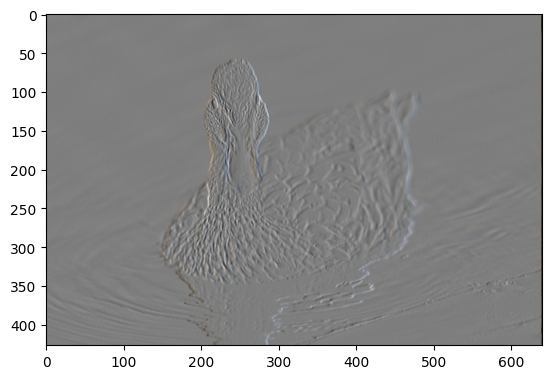

In [13]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

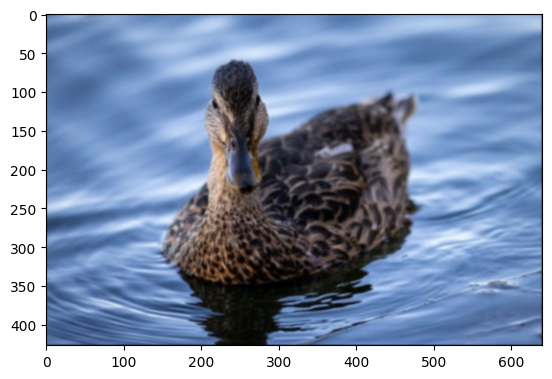

In [14]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)